# Homework 2 - Fish Tank - Daniel Kim #
 

In [15]:
#importing libraries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# setting given constants in the question 

#Input parameters
Wedot = 100 #w 
WGlass = 10 #lb 

#Geometry
L = 0.505 #m
W = 0.254 #m
H = 0.3048 #m 

#Fixed temperatures 

T_initial = 15 #C
T_inf = 21 #C
T_set = 27 #C

#Thermal properties
#https://www.makeitfrom.com/material-properties/Toughened-Tempered-Soda-Lime-Glass
rho_glass = 2520 #kg/m^3
c_glass = 720 #J/kg/K
rho_H2O = 990 #kg/m^3
c_H2O = 4200 #J/kg/K

#Heat Transfer Coefficients
U_surface = 13 #W/m^2/K
U_side = 8.50 #W/m^2/K
U_floor = 3 #W/m^2/K

#### Derived parameters, capitances, and resistances ####

Thermal resistance formula is as follows : 
$ R = \frac{L}{KA} = \frac{1}{UA}$ where <br>
L = Material conductivity($Wm^{-1}k^{-1}$)<br>
K = Material thickness($m$)<br>
U = HT coefficient ($Wm^{-2}k^{-1}$)<br>
A = Material cross-sectional area($m^2$)<br>

In [16]:
#Parameters
M_glass = WGlass * 0.453592 #kg
A_glass = 2 * (W * H) + 2 * (L * H) +  (L * H) #m^2 (#2 x side(W*H) + 2 x front(L*H) + 1 bottom(W*H))
t_glass = M_glass / (rho_glass * A_glass) #m 
M_H2O = L * W * H * rho_H2O #kg
Asurf = L * W #m^2
Afloor = Asurf #m^2
A_side = 2 * H * L + 2 * H * W #m^2

#Capitances
C_glass = M_glass * c_glass #J/K
C_H2O = M_H2O * c_H2O #J/K
C_lump = C_glass + C_H2O #J/K

#### Modelling the system as thermal circuit #### 
<img src="Slide4.jpg" alt="Overview of a thermal circuit model" width="500"/>



In [18]:
#Resistance 
R_surface = 1 / (Asurf * U_surface) #K/W
R_side = 1 / (A_side * U_side) #K/W
R_floor = 1 / (Afloor * U_floor) #K/W
#Uitlizing the parallel resistance equation to find the total resistance
R_equiv = 1 / (1/R_surface + 1/R_side + 1/R_floor) #K/W

#time constant 
tau = C_lump * R_equiv # Tau = RC = Mc/UA
tau_hour = tau / 3600 #s to hours

#Steady state temperature 
T_ss = T_inf + (Wedot * R_equiv) #C 

#Target theta
theta_target = (T_set - T_ss)/(T_initial - T_ss) #C

display("Time constant tau(S):",tau, "Steady state temperature:", T_ss, "Dimensionless temperature of the target :",theta_target)

%whos

'Time constant tau(S):'

27706.874925064585

'Steady state temperature:'

37.70800673078709

'Dimensionless temperature of the target :'

0.4715520326259801

Variable                        Type         Data/Info
------------------------------------------------------
A_glass                         float        0.6166104000000001
A_side                          float        0.46268640000000005
Afloor                          float        0.12827
Asurf                           float        0.12827
C_H2O                           float        162564.061968
C_glass                         float        3265.8624
C_lump                          float        165829.924368
H                               float        0.3048
L                               float        0.505
M_H2O                           float        38.70572904
M_glass                         float        4.53592
R_equiv                         float        0.16708006730787092
R_floor                         float        2.5986850653569293
R_side                          float        0.2542695415804947
R_surface                       float        0.5996965535439067
T_inf       

In [19]:
print(R_surface, R_side, R_floor, R_equiv)

0.5996965535439067 0.2542695415804947 2.5986850653569293 0.16708006730787092


#### Calculating We_reset ####
<img src="Slide5.jpg" alt="Overview of a thermal circuit model" width="500"/>

In [20]:
# Results 
import datetime
time_to_target = -tau * np.log(theta_target) #s
print("Time to target in seconds is: ", time_to_target)

time_to_target_hours = time_to_target / 3600 #hours
time_to_target_hours_coherent = datetime.timedelta(seconds=time_to_target)
print("Time to target in hours is: ", time_to_target_hours, "in Hour:minutes:seconds form",time_to_target_hours_coherent)

We_reset = (T_set - T_inf) / R_equiv #W
print("Power required to maintain target temperature is: ", We_reset, "W")

Time to target in seconds is:  20827.97347995542
Time to target in hours is:  5.785548188876506 in Hour:minutes:seconds form 5:47:07.973480
Power required to maintain target temperature is:  35.91092640000001 W


#### Simulations ####

In [21]:
import pandas as pd
import numpy as np

df = pd.DataFrame(0, index=range(0, 21), columns=[f'Column_{i+1}' for i in range(7)])
df = df.rename(columns={'Column_1': 'time', 'Column_2': 'Theta', 'Column_4': 'Qtop (W)',
                        'Column_5': 'Qside (W)', 'Column_6': 'Qfloor (W)', 'Column_7': 'Qnet (W)', 'Column_3': 'T(C)'})

dt = time_to_target_hours / 20  #hours
df['time'] = np.arange(0, time_to_target_hours + dt, dt)
df['Theta'] = np.exp(-df['time'] / tau_hour)
df['T(C)'] = T_ss + (T_initial - T_ss) * df['Theta']
df['Qtop (W)'] = (T_inf - df['T(C)']) / R_surface
df['Qside (W)'] = (T_inf - df['T(C)']) / R_side
df['Qfloor (W)'] = (T_inf - df['T(C)']) / R_floor
df['Qnet (W)'] = df['Qtop (W)'] + df['Qside (W)'] + df['Qfloor (W)']

display(df)


,time,Theta,T(C),Qtop (W),Qside (W),Qfloor (W),Qnet (W)
0,0.000000,1.000000,15.000000,10.005060,23.597006,2.308860,35.910926
1,0.289277,0.963111,15.837669,8.608239,20.302594,1.986517,30.897350
2,0.578555,0.927583,16.644437,7.262945,17.129708,1.676064,26.068718
3,0.867832,0.893366,17.421445,5.967277,14.073866,1.377064,21.418207
4,1.157110,0.860411,18.169789,4.719405,11.130750,1.089093,16.939248
5,1.446387,0.828672,18.890529,3.517565,8.296202,0.811746,12.625512
6,1.735664,0.798103,19.584681,2.360059,5.566216,0.544629,8.470904
7,2.024942,0.768662,20.253227,1.245252,2.936936,0.287366,4.469554
8,2.314219,0.740307,20.897111,0.171569,0.404647,0.039593,0.615808
9,2.603497,0.712998,21.517243,-0.862507,-2.034230,-0.199040,-3.095777


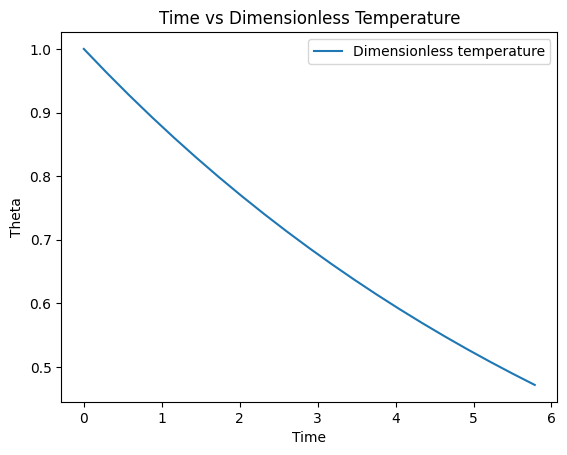

In [22]:
plt.plot(df['time'], df['Theta'], label='Dimensionless temperature')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.title('Time vs Dimensionless Temperature')
plt.legend()
plt.show()

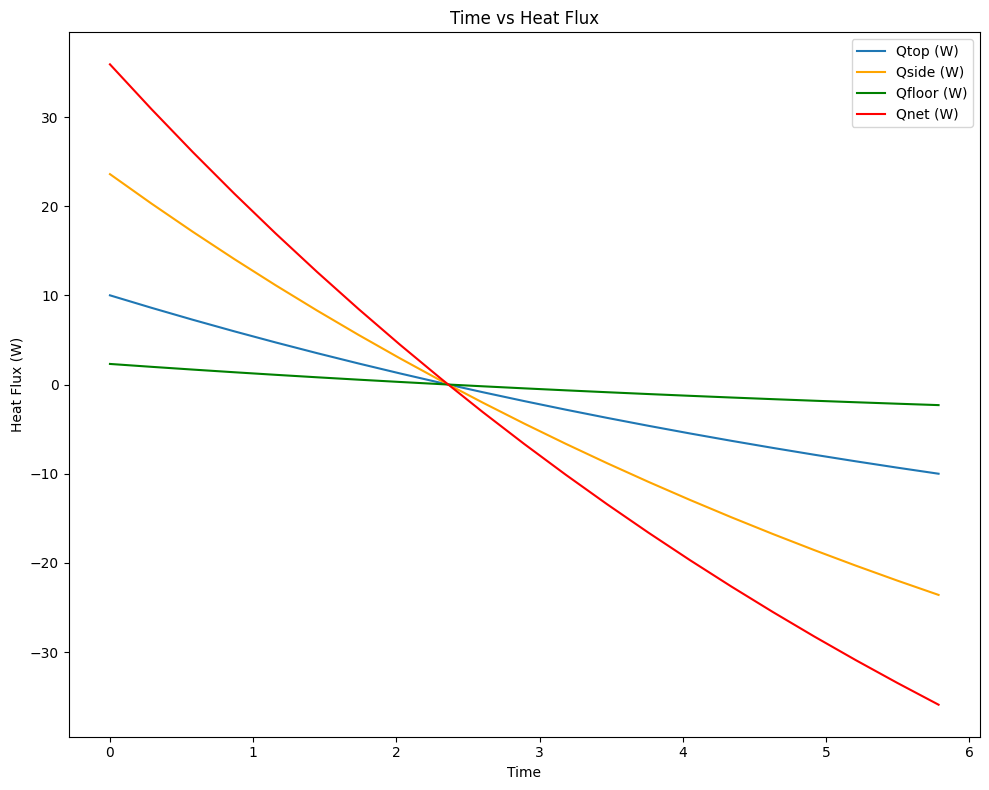

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df['time'], df['Qtop (W)'], label='Qtop (W)')
ax.plot(df['time'], df['Qside (W)'], label='Qside (W)', color='orange')
ax.plot(df['time'], df['Qfloor (W)'], label='Qfloor (W)', color='green')
ax.plot(df['time'], df['Qnet (W)'], label='Qnet (W)', color='red')

ax.set_xlabel('Time')
ax.set_ylabel('Heat Flux (W)')
ax.set_title('Time vs Heat Flux')
ax.legend()

plt.tight_layout()
plt.show()
